In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = ("https://raw.githubusercontent.com/Kingbigtiger/Datasets/master/imdb_labelled.txt")
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['text', 'classification']
sms_raw.classification[0]

print(sms_raw)

                                                  text  classification
0    A very, very, very slow-moving, aimless movie ...               0
1    Not sure who was more lost - the flat characte...               0
2    Attempting artiness with black & white and cle...               0
3         Very little music or anything to speak of.                 0
4    The best scene in the movie was when Gerardo i...               1
5    The rest of the movie lacks art, charm, meanin...               0
6                                  Wasted two hours.                 0
7    Saw the movie today and thought it was a good ...               1
8                                 A bit predictable.                 0
9    Loved the casting of Jimmy Buffet as the scien...               1
10                And those baby owls were adorable.                 1
11   The movie showed a lot of Florida at it's best...               1
12   The Songs Were The Best And The Muppets Were S...               1
13    

In [3]:
positive_feedback = sms_raw[sms_raw.classification==1]
negative_feedback = sms_raw[sms_raw.classification==0]

print(positive_feedback)
print(negative_feedback)

                                                  text  classification
4    The best scene in the movie was when Gerardo i...               1
7    Saw the movie today and thought it was a good ...               1
9    Loved the casting of Jimmy Buffet as the scien...               1
10                And those baby owls were adorable.                 1
11   The movie showed a lot of Florida at it's best...               1
12   The Songs Were The Best And The Muppets Were S...               1
13                                   It Was So Cool.                 1
14   This is a very "right on case" movie that deli...               1
16   This review is long overdue, since I consider ...               1
17   I'll put this gem up against any movie in term...               1
18   It's practically perfect in all of them  a tr...               1
20   This if the first movie I've given a 10 to in ...               1
21   If there was ever a movie that needed word-of-...               1
22   O

In [4]:
positive_feedback.describe()


,classification
count,386.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [5]:
keywords = ['good', 'loved', 'terrific', 'excellent', 'two', 'best', 'great', 'enjoy']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [6]:
sms_raw.head()

,text,classification,good,loved,terrific,excellent,two,best,great,enjoy
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,False,False,False,False,False,True,False,False


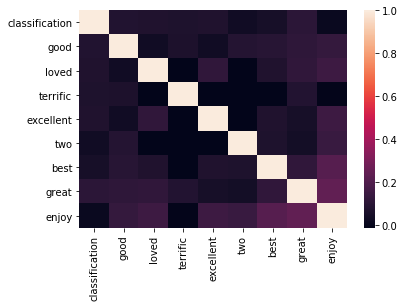

In [7]:
sns.heatmap(sms_raw.corr())

In [8]:
data = sms_raw[keywords]
target = sms_raw['classification']

In [9]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

x = ((data.shape[0])-(target != y_pred).sum())
print("{} %".format(100*(x / (data.shape[0]))))

Number of mislabeled points out of a total 748 points : 331
55.74866310160428 %


In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[341,  21],
       [310,  76]], dtype=int64)

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=5)
#cv represents folds

array([0.52980132, 0.58      , 0.54362416, 0.59060403, 0.51006711])

In [12]:
#Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('Testing on Sample: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Training on Model: ' + str(bnb.fit(X_train, y_train).score(X_train, y_train)))
#sometimes reference 20% is training accuracy and the testing on sample is validation accuracy

Testing on Sample: 0.54
Training on Model: 0.5618729096989966


## Version 2

In [13]:
keywords = ['adorable', 'best scene', 'terrific', 'excellent', 'loved', 'best', 'great', 'enjoy']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [14]:
sms_raw.head()

,text,classification,good,loved,terrific,excellent,two,best,great,enjoy,adorable,best scene
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,False,False,False,False,False,True,False,False,False,True


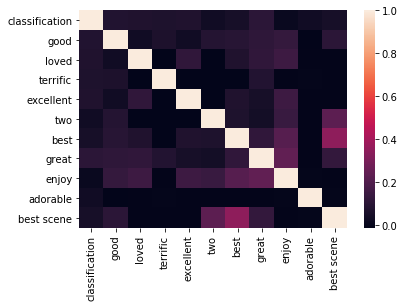

In [15]:
sns.heatmap(sms_raw.corr())

In [16]:
data = sms_raw[keywords]
target = sms_raw['classification']

In [17]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

x = ((data.shape[0])-(target != y_pred).sum())
print("{} %".format(100*(x / (data.shape[0]))))

Number of mislabeled points out of a total 748 points : 344
54.01069518716578 %


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[353,   9],
       [335,  51]], dtype=int64)

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=5)
#cv represents folds

array([0.53642384, 0.54      , 0.54362416, 0.54362416, 0.51677852])

In [20]:
#Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('Testing on Sample: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Training on Model: ' + str(bnb.fit(X_train, y_train).score(X_train, y_train)))
#sometimes reference 20% is training accuracy and the testing on sample is validation accuracy

Testing on Sample: 0.5266666666666666
Training on Model: 0.5434782608695652


## Version 3


In [21]:
keywords = ['cool', 'love', 'great', 'excellent', 'best', 'awesome', 'enjoy']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [22]:
sms_raw.head()

,text,classification,good,loved,terrific,excellent,two,best,great,enjoy,adorable,best scene,cool,love,awesome
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,False,False,False,False,False,True,False,False,False,True,False,False,False


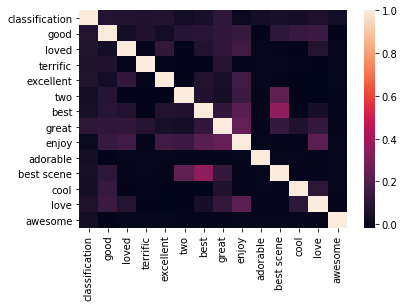

In [23]:
sns.heatmap(sms_raw.corr())

In [24]:
data = sms_raw[keywords]
target = sms_raw['classification']

In [25]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

x = ((data.shape[0])-(target != y_pred).sum())
print("{} %".format(100*(x / (data.shape[0]))))

Number of mislabeled points out of a total 748 points : 344
54.01069518716578 %


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[350,  12],
       [332,  54]], dtype=int64)

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=5)
#cv represents folds

array([0.51655629, 0.54      , 0.55033557, 0.55704698, 0.51677852])

In [28]:
#Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('Testing on Sample: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Training on Model: ' + str(bnb.fit(X_train, y_train).score(X_train, y_train)))
#sometimes reference 20% is training accuracy and the testing on sample is validation accuracy

Testing on Sample: 0.52
Training on Model: 0.5434782608695652


## Version 4

In [29]:
keywords = ['good', 'loved', 'terrific', 'excellent', 'two', 'best', 'great', 'enjoy', 'beautiful']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [30]:
sms_raw.head()

,text,classification,good,loved,terrific,excellent,two,best,great,enjoy,adorable,best scene,cool,love,awesome,beautiful
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,False,False,False,False,False,True,False,False,False,True,False,False,False,False


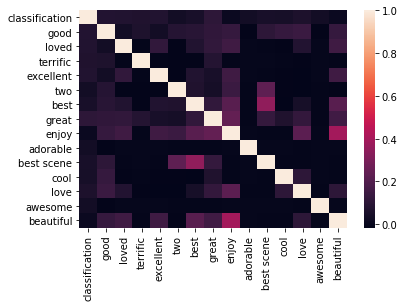

In [31]:
sns.heatmap(sms_raw.corr())

In [32]:
data = sms_raw[keywords]
target = sms_raw['classification']

In [33]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

x = ((data.shape[0])-(target != y_pred).sum())
print("{} %".format(100*(x / (data.shape[0]))))

Number of mislabeled points out of a total 748 points : 328
56.14973262032086 %


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[341,  21],
       [307,  79]], dtype=int64)

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=5)
#cv represents folds

array([0.53642384, 0.58666667, 0.54362416, 0.59060403, 0.51006711])

In [36]:
#Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('Testing on Sample: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Training on Model: ' + str(bnb.fit(X_train, y_train).score(X_train, y_train)))
#sometimes reference 20% is training accuracy and the testing on sample is validation accuracy

Testing on Sample: 0.54
Training on Model: 0.5668896321070234


## Version 5

In [37]:
keywords = ['good', 'loved', 'excellent', 'two', 'best', 'scene', 'enjoy', 'like']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [38]:
sms_raw.head()

,text,classification,good,loved,terrific,excellent,two,best,great,enjoy,adorable,best scene,cool,love,awesome,beautiful,scene,like
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False


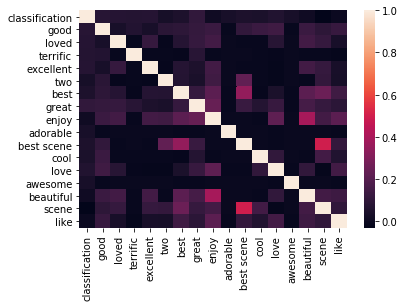

In [39]:
sns.heatmap(sms_raw.corr())

In [40]:
data = sms_raw[keywords]
target = sms_raw['classification']

In [41]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

x = ((data.shape[0])-(target != y_pred).sum())
print("{} %".format(100*(x / (data.shape[0]))))

Number of mislabeled points out of a total 748 points : 346
53.7433155080214 %


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[345,  17],
       [329,  57]], dtype=int64)

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=5)
#cv represents folds

array([0.51655629, 0.56      , 0.5033557 , 0.51677852, 0.48993289])

In [44]:
#Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('Testing on Sample: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Training on Model: ' + str(bnb.fit(X_train, y_train).score(X_train, y_train)))
#sometimes reference 20% is training accuracy and the testing on sample is validation accuracy

Testing on Sample: 0.5266666666666666
Training on Model: 0.540133779264214


Version number 4 seems to be the best performance given the dataset. It's accuracy is about 57% with compared to the first set of features with the classifier. Versions number 2,3,5 have lower numbers for the accuracy and a bit of overfitting in the corrolation heat matrix that you can see. Cross validation seems to always fall in line with features being used.   